# Хакатон SocialHack 
# Кейс: Прогнозирование потребления энергии 

#### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from sklearn import preprocessing
%matplotlib inline

#### Подгружаем файл со статистическими данными

In [4]:
table = pd.read_excel('data/hack_4_50.xlsx')
table = table.replace(np.nan,0)
table = table.astype(np.float64)
table.columns

Index(['Time', 'Year', 'Month', 'Day_of_week', 'Season', 'Temperature',
       'Number_Of_Guest_Nights', 'Total_hours_worked', 'Sales_new_vehicles',
       'Demand'],
      dtype='object')

In [5]:
table

,Time,Year,Month,Day_of_week,Season,Temperature,Number_Of_Guest_Nights,Total_hours_worked,Sales_new_vehicles,Demand
0,0.0,1.0,4.0,6.0,2.0,14.5,42178210.0,1488.0,324738.0,2.555
1,1.0,1.0,4.0,6.0,2.0,13.3,42178210.0,1488.0,324738.0,2.433
2,2.0,1.0,4.0,6.0,2.0,13.8,42178210.0,1488.0,324738.0,2.393
3,3.0,1.0,4.0,6.0,2.0,13.0,42178210.0,1488.0,324738.0,2.375
4,4.0,1.0,4.0,6.0,2.0,12.2,42178210.0,1488.0,324738.0,2.390
5,5.0,1.0,4.0,6.0,2.0,11.2,42178210.0,1488.0,324738.0,2.467
6,6.0,1.0,4.0,6.0,2.0,10.8,42178210.0,1488.0,324738.0,2.631
7,7.0,1.0,4.0,6.0,2.0,12.1,42178210.0,1488.0,324738.0,2.775
8,8.0,1.0,4.0,6.0,2.0,13.8,42178210.0,1488.0,324738.0,2.965
9,9.0,1.0,4.0,6.0,2.0,15.3,42178210.0,1488.0,324738.0,3.159


#### Составим корреляционную матрицу для определения зависимостей между параметрами и значением спроса на электроэнергию

Text(0.5, 1.0, 'Correlation between different features')

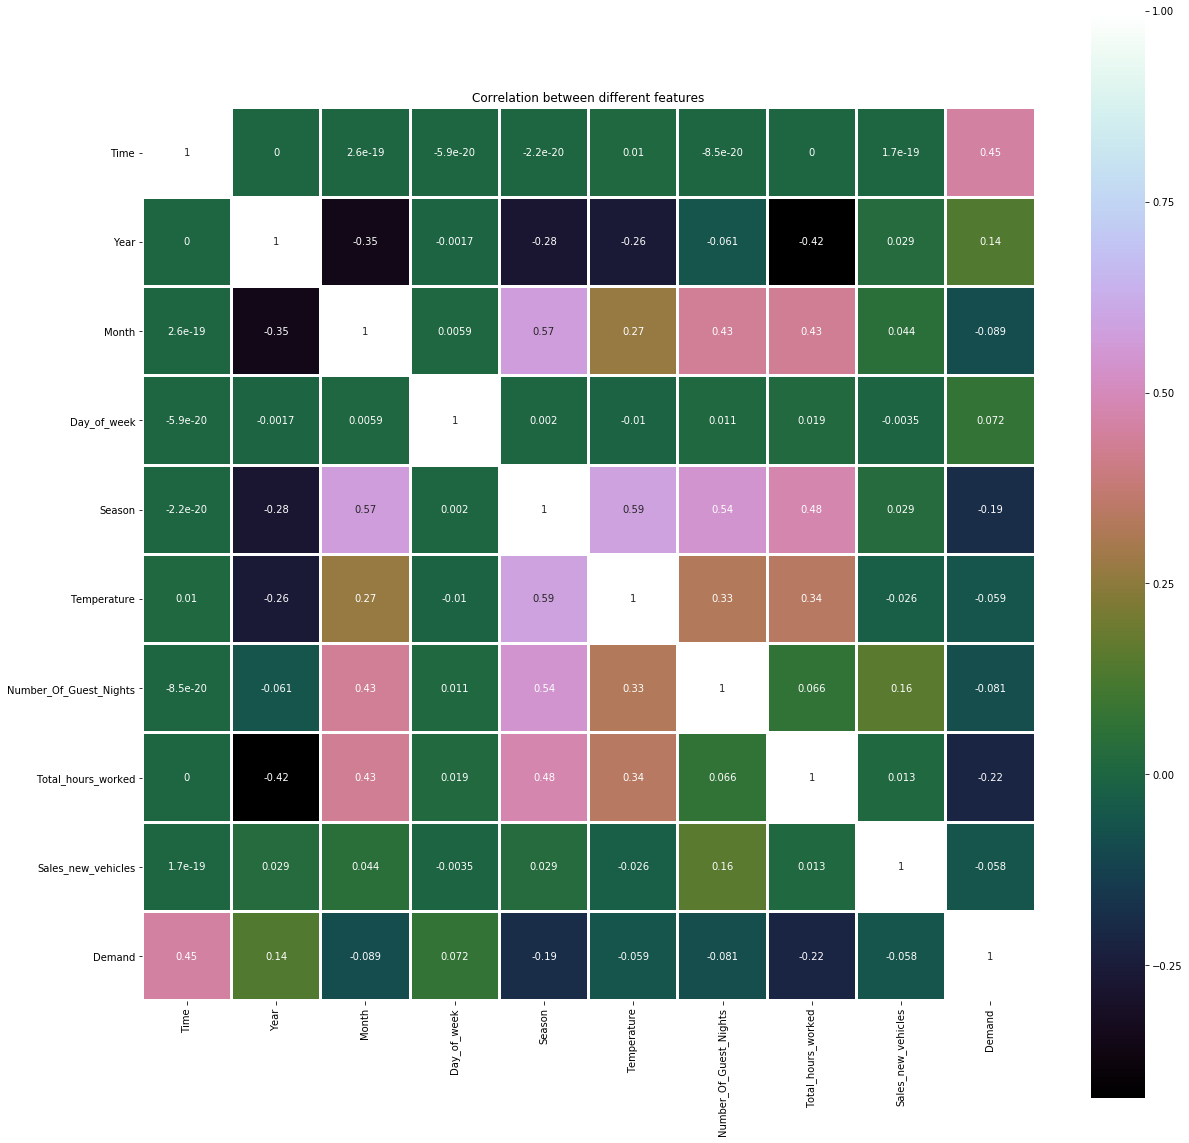

In [7]:
correlation = table.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix',linewidths=2)
plt.title('Correlation between different features')

#### На графиках зависимостей параметров от величины спроса рассмотрим распределение их значений

C:\Users\remem\.conda\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 2880x4320 with 0 Axes>

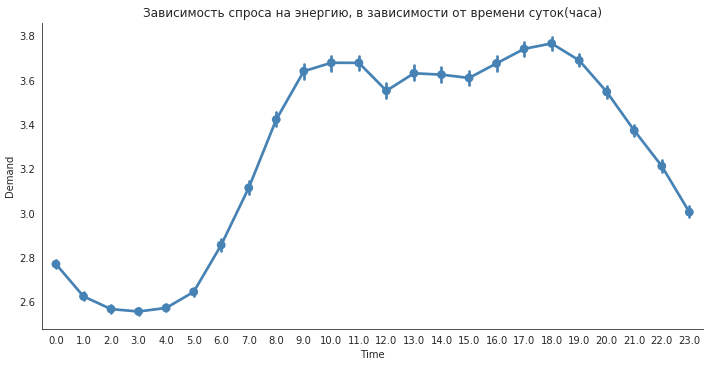

In [8]:
plt.figure(figsize=(40,60))
with sns.axes_style('white'):
    g = sns.factorplot("Time","Demand", data=table, aspect=2,
                        color='steelblue')
    #g.set_xticklabels(step=40)
plt.title('Зависимость спроса на энергию, в зависимости от времени суток(часа)')
plt.show()

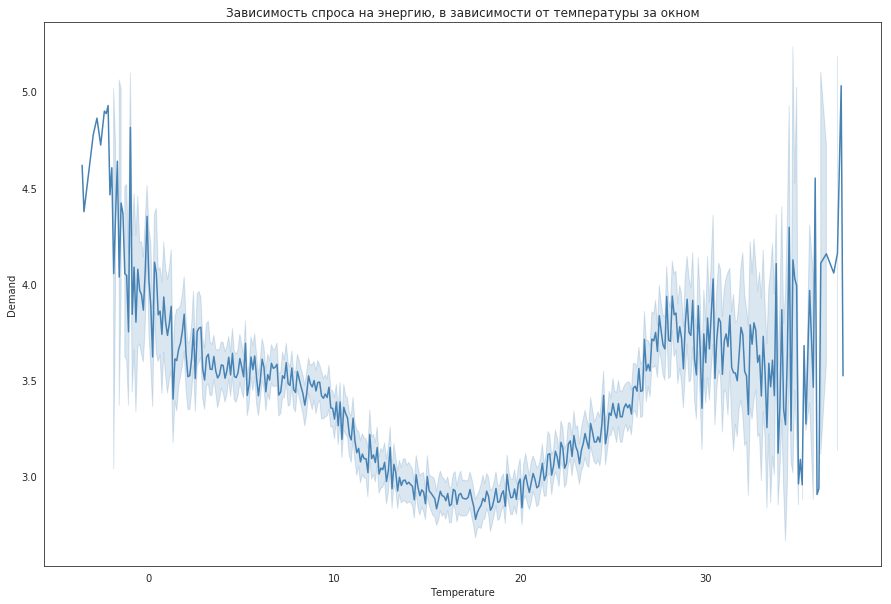

In [30]:
plt.figure(figsize=(15,10))
with sns.axes_style('white'):
    g = sns.lineplot("Temperature","Demand", data=table,
                        color='steelblue')
    #r = sns.scatterplot("Temperature","Demand", data=table,
                        #color='steelblue')
    #g.set_xticklabels(step=40)
plt.title('Зависимость спроса на энергию, в зависимости от температуры за окном')
plt.show()

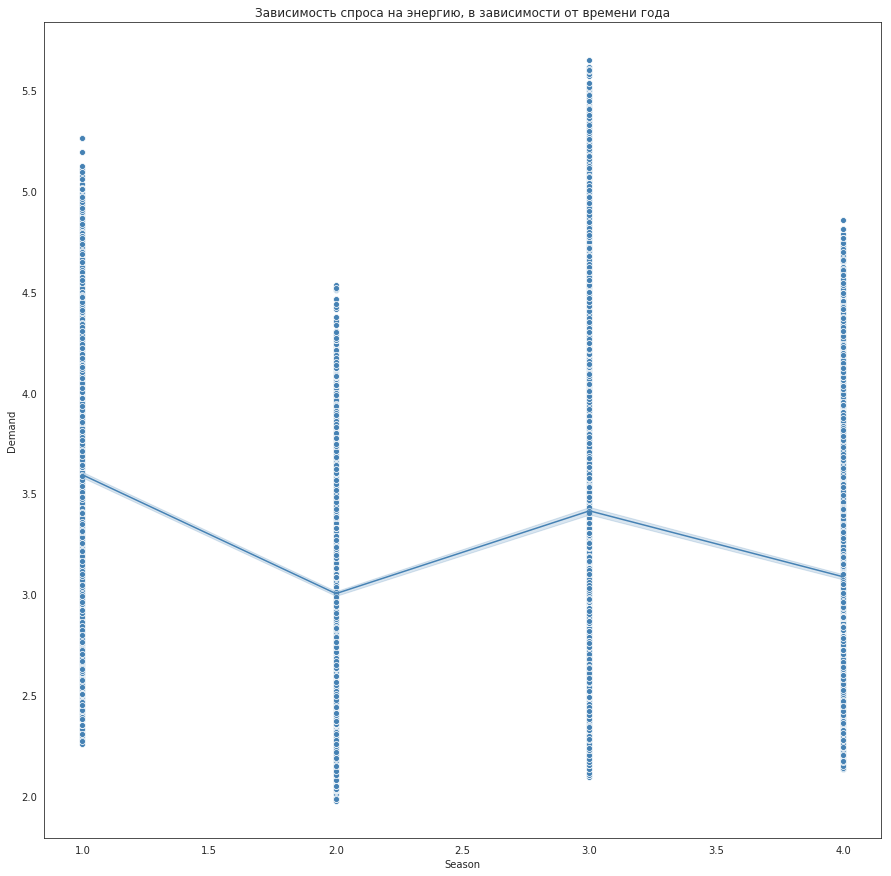

In [21]:
plt.figure(figsize=(15,15))
with sns.axes_style('white'):
    g = sns.scatterplot("Season","Demand", data=table,
                        color='steelblue')
    r = sns.lineplot("Season","Demand", data=table,
                        color='steelblue')
plt.title('Зависимость спроса на энергию, в зависимости от времени года')
plt.show()

#### Проведем нормализацию данных

In [22]:
COLUMNS = ['Time', 'Year', 'Month', 'Day_of_week', 'Season', 'Temperature',
       'Number_Of_Guest_Nights', 'Total_hours_worked', 'Sales_new_vehicles']
table_2 = table[COLUMNS]

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(table_2)
df_normalized = pd.DataFrame(np_scaled)
df_normalized['9']=table['Demand']

In [24]:
df_normalized

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.0,0.272727,0.833333,0.333333,0.441463,0.306226,0.989305,0.483919,2.555
1,0.043478,0.0,0.272727,0.833333,0.333333,0.412195,0.306226,0.989305,0.483919,2.433
2,0.086957,0.0,0.272727,0.833333,0.333333,0.424390,0.306226,0.989305,0.483919,2.393
3,0.130435,0.0,0.272727,0.833333,0.333333,0.404878,0.306226,0.989305,0.483919,2.375
4,0.173913,0.0,0.272727,0.833333,0.333333,0.385366,0.306226,0.989305,0.483919,2.390
5,0.217391,0.0,0.272727,0.833333,0.333333,0.360976,0.306226,0.989305,0.483919,2.467
6,0.260870,0.0,0.272727,0.833333,0.333333,0.351220,0.306226,0.989305,0.483919,2.631
7,0.304348,0.0,0.272727,0.833333,0.333333,0.382927,0.306226,0.989305,0.483919,2.775
8,0.347826,0.0,0.272727,0.833333,0.333333,0.424390,0.306226,0.989305,0.483919,2.965
9,0.391304,0.0,0.272727,0.833333,0.333333,0.460976,0.306226,0.989305,0.483919,3.159


#### Разобьем выборку на тренировочную и валидационную

In [25]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(table, test_size = 0.2, random_state=42)

In [ ]:
train.to_csv('train_4.csv',index=False)
test.to_csv('test_4.csv',index=False)

# !Attention
# Обучение модели проводилось на онлайн-платформе GoogleColab
## Код ниже для воспроизведения непосредственно там

#### Подгружаем нашу выборку

In [ ]:
from google.colab import files
uploaded = files.upload()
!ls

#### Импортируем модули

In [ ]:
import numpy as np #модуль для численных манипуляций с большим объемом данных
import pandas as pd #модуль для работы с таблицами
from sklearn.ensemble import GradientBoostingRegressor #модуль для градиентного бустинга
from sklearn.metrics import mean_squared_error #для подсчета значения MAE - абсолютной ошибки
import seaborn as sns #для отрисовки графиков
from math import sqrt
import matplotlib.pyplot as plt
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))
!pip install catboost
%matplotlib inline

 #### Переводим файлы в таблицы pandas

In [ ]:
train = pd.read_csv('train_4.csv')
test = pd.read_csv('test_4.csv')
train = train.replace(np.nan,0)
test = test.replace(np.nan, 0)

#### Разделяем валидационную и тренировочную выборки для проведения обучения

In [ ]:
test.columns

In [ ]:
COLUMNS = ['Time', 'Year', 'Month', 'Day_of_week', 'Season', 'Temperature',
       'Number_Of_Guest_Nights', 'Total_hours_worked', 'Sales_new_vehicles']
           
y_train = train['Demand'].values
X_train = train[COLUMNS].values
X_test = test[COLUMNS].values
y_test = test['Demand'].values

#### Запускаем обучение модели

In [ ]:
from catboost import Pool, CatBoostRegressor
train_pool = Pool(X_train, y_train)#, cat_features=[0,2,5])
test_pool = Pool(X_test)
model = CatBoostRegressor(iterations=8000, depth=8, learning_rate=0.3, loss_function='RMSE')
#train the model
model.fit(train_pool,plot = True)


#### Спрогнозируем спрос на электроэнергию на тестовой выборке, подсчитаем ошибку по метрике RMSE

In [ ]:
preds = model.predict(test_pool)
sqrt(mean_squared_error(y_test, preds))

In [27]:
output_data = pd.DataFrame({'Real_Demand': [],'Predict_Demand': [], 'Temperature': []})
output_data['Real_Demand'] = preds
output_data['Predict_Demand'] = y_test
output_data['Temperature'] = test['Temperature']
output_data

NameError: name 'y_test' is not defined

#### Построим графики зависимости спрогнозированного и реального спроса на энергию от температуры

In [ ]:
plt.figure(figsize=(65,15))
sns.set(style="whitegrid")
# RGB:

sns.lineplot(output_data['Temperature'],output_data['Real_Demand'], palette='tab10',color='green', linewidth=4).get_children()[0].set_color('w')
# RGBA:
sns.lineplot(output_data['Temperature'],output_data['Predict_Demand'], palette='tab10',color='red', linewidth=4).get_children()[1].set_color('w')
plt.title('Зависимость спроса на энергию, в зависимости от температуры, ')
plt.show()